In [76]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# Load the dataset
df = pd.read_excel("/content/dataBiomass_CE880.xlsx")

In [78]:
# Display the first few rows of the dataset
df.head()

,Number,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
0,1,0.460025,0.28884,0.251135,665.0,1.0,0.25,0.0,0.22,9.696970,48.242424,35.030303,7.030303,9.646865,24.0,0.0
1,2,0.460025,0.28884,0.251135,744.0,1.0,0.30,0.0,0.22,10.125904,40.048219,43.477096,6.348781,8.416246,21.7,0.0
2,3,0.460025,0.28884,0.251135,811.0,1.0,0.35,0.0,0.22,9.614294,36.159955,48.610323,5.615428,7.608063,19.0,0.0
3,4,0.460025,0.28884,0.251135,670.0,1.0,0.25,0.0,0.28,9.686536,46.993834,37.255910,6.063720,9.141723,29.6,0.0
4,5,0.460025,0.28884,0.251135,750.0,1.0,0.30,0.0,0.28,9.368972,39.763020,45.356848,5.511160,7.998170,27.4,0.0


In [79]:
# Check for missing values
df.isnull().sum()

Number                         0
Cellulose                      0
Hemicellulose                  0
Lignin                         0
Temp                           0
Pressure                       0
Equivalance mass ratio         0
Steam to biomass mass ratio    0
Superficial gas velocity       0
H2                             0
CO                             0
CO2                            0
CH4                            0
Lower heating value            0
Char yield                     0
tar yield                      0
dtype: int64

In [80]:
# Summary statistics
df.describe()

,Number,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,168.500000,0.452065,0.280841,0.267094,752.547515,1.246518,0.181179,0.578095,0.747241,25.997105,31.618541,31.782387,10.581432,6.813697,11.288135,16.546825
std,97.139076,0.081601,0.088872,0.086694,85.306413,0.949579,0.166832,1.134802,1.221697,10.132968,6.825742,8.802861,3.978783,2.820948,10.626665,22.510391
min,1.000000,0.196078,0.078707,0.102000,600.000000,1.000000,0.000000,0.000000,0.021893,5.388034,5.012658,6.780000,1.310700,1.744396,0.000000,0.000000
25%,84.750000,0.435622,0.249327,0.203039,657.500000,1.000000,0.000000,0.000000,0.189035,20.645197,27.625389,25.136941,7.798019,4.863707,3.200000,0.011750
50%,168.500000,0.452000,0.289855,0.251135,780.000000,1.000000,0.230000,0.330000,0.555000,26.404713,32.577731,30.473296,9.532769,6.556189,6.880718,6.640000
75%,252.250000,0.502865,0.327000,0.298283,815.000000,1.000000,0.300000,0.700000,0.714364,31.066629,35.928018,36.838649,13.703169,8.322500,17.900000,25.100000
max,336.000000,0.584000,0.627451,0.489926,900.000000,10.000000,0.864198,8.028674,9.589655,66.033993,55.440000,62.560216,20.120987,14.956647,45.000000,134.100000


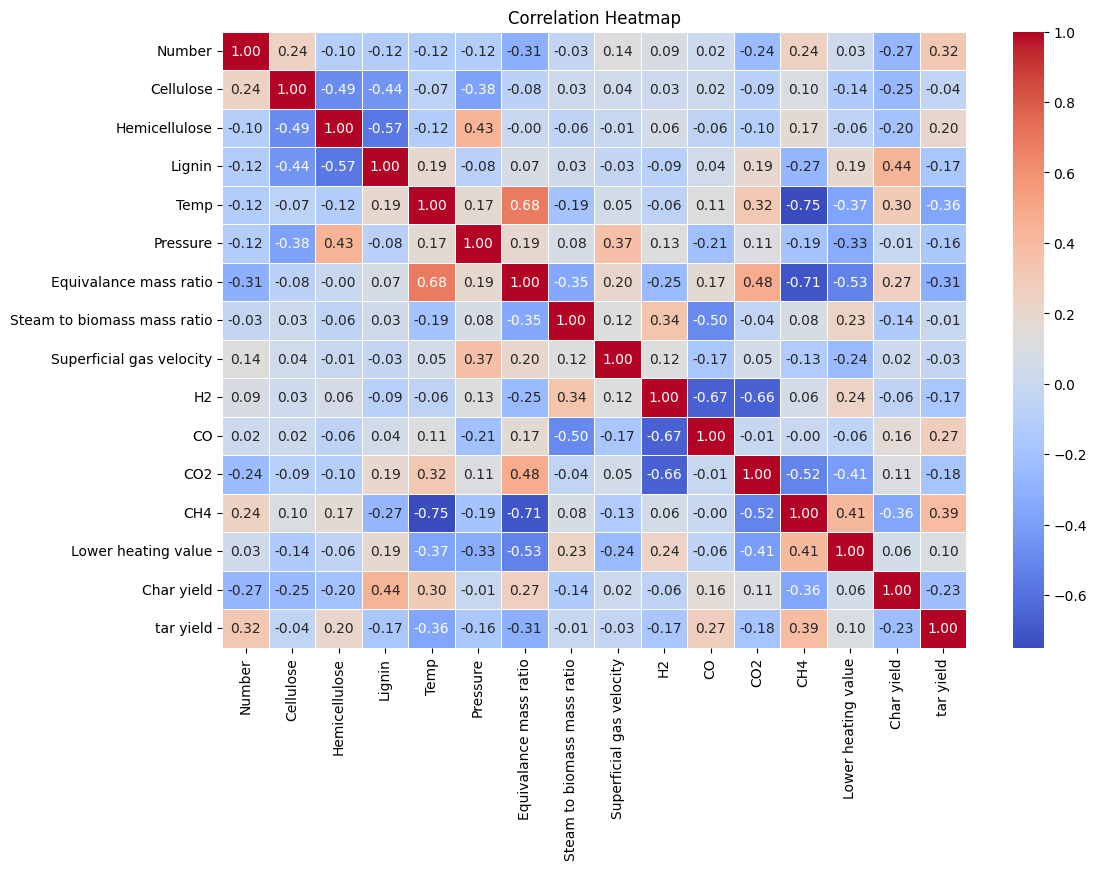

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap for correlation visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [82]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                               Number  Cellulose  Hemicellulose    Lignin  \
Number                       1.000000   0.243497      -0.101737 -0.124898   
Cellulose                    0.243497   1.000000      -0.485455 -0.443599   
Hemicellulose               -0.101737  -0.485455       1.000000 -0.568188   
Lignin                      -0.124898  -0.443599      -0.568188  1.000000   
Temp                        -0.116693  -0.072245      -0.117252  0.188198   
Pressure                    -0.120472  -0.384294       0.434773 -0.083979   
Equivalance mass ratio      -0.311824  -0.075140      -0.000583  0.071323   
Steam to biomass mass ratio -0.031331   0.027429      -0.057108  0.032725   
Superficial gas velocity     0.137021   0.038385      -0.009115 -0.026786   
H2                           0.094073   0.028854       0.063888 -0.092651   
CO                           0.023249   0.019529      -0.061034  0.044185   
CO2                         -0.238897  -0.093062      -

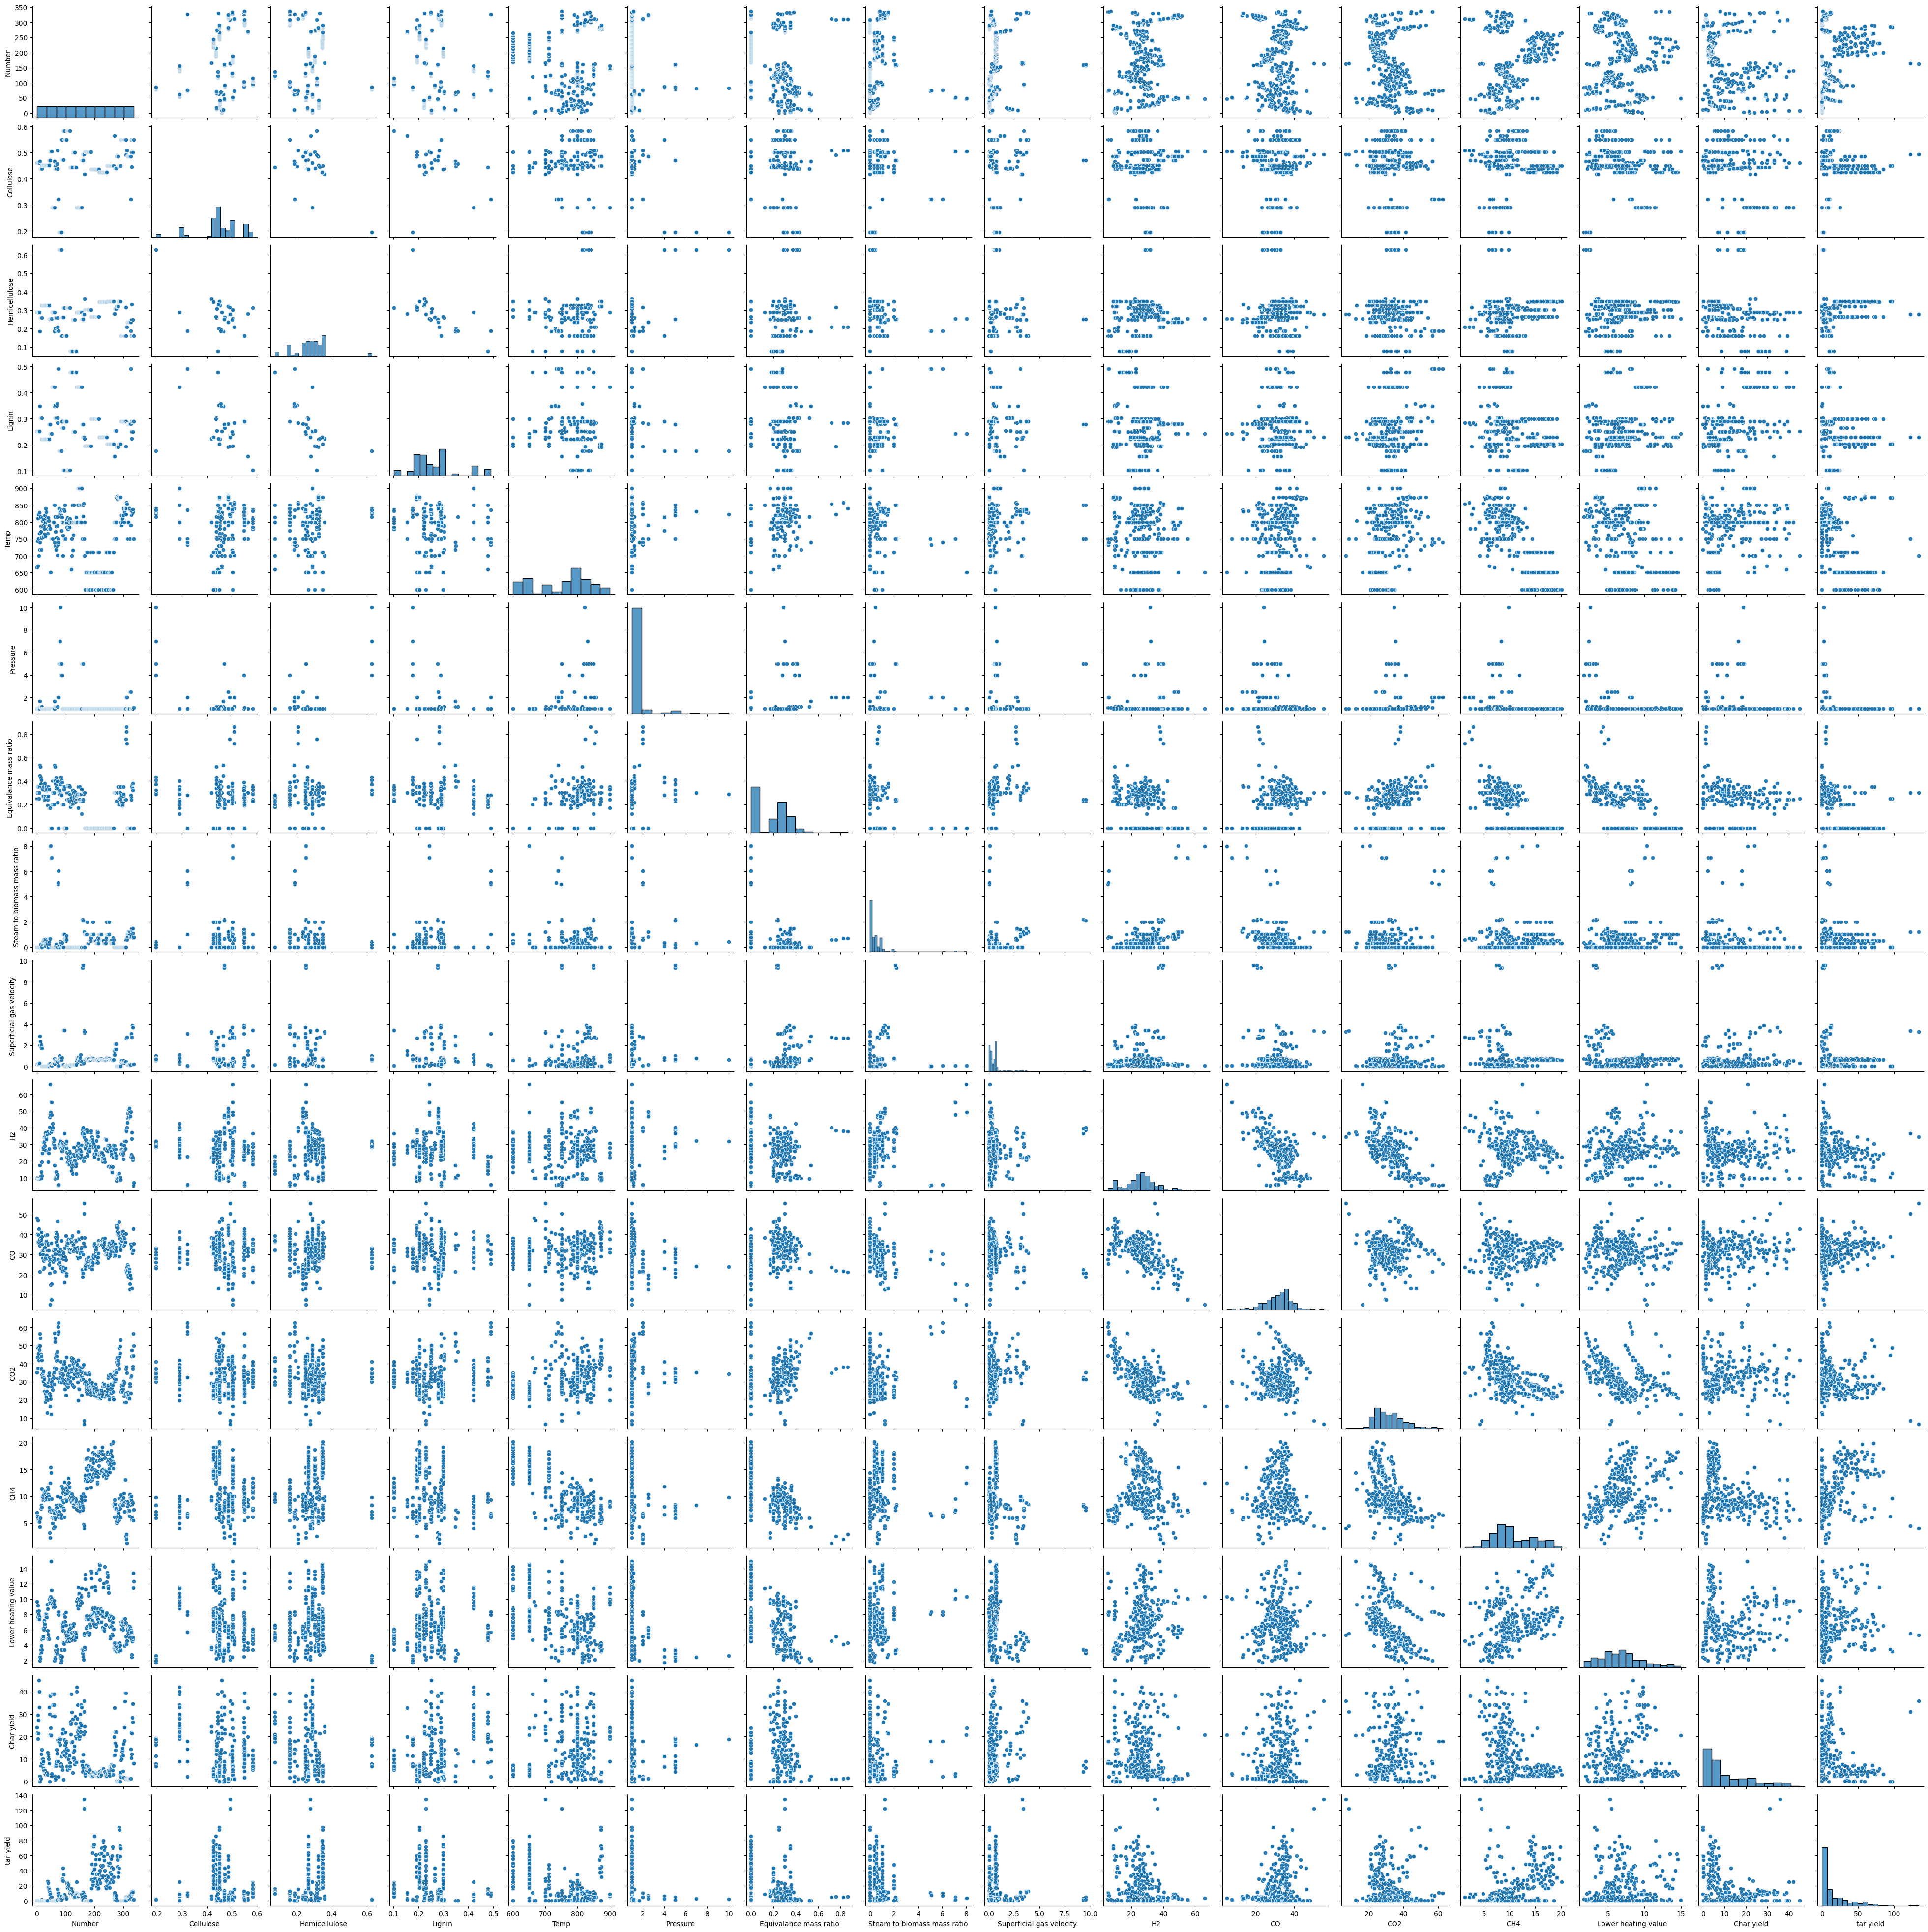

In [47]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df)
plt.show()

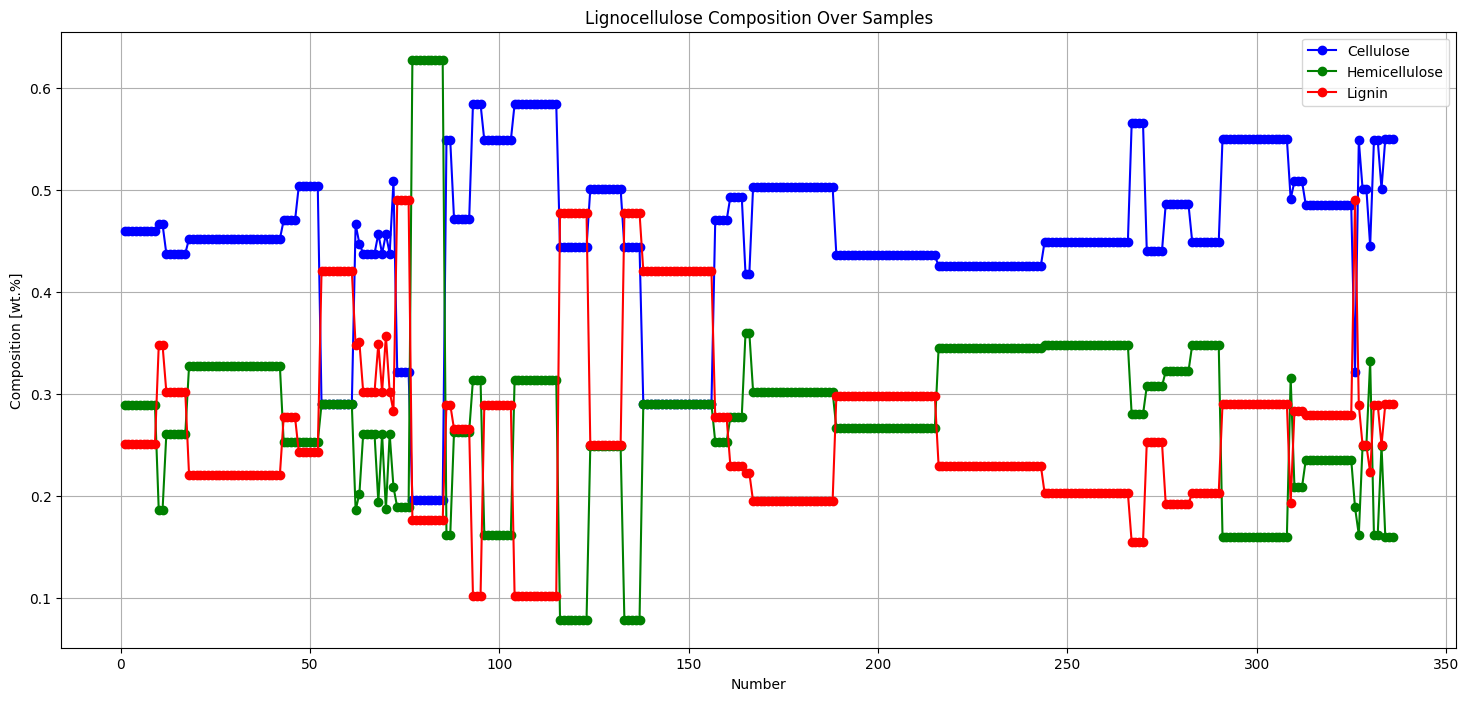

In [83]:
# Line chart for Lignocellulose composition
plt.figure(figsize=(18, 8))

# Line plot for Cellulose
plt.plot(df['Number'], df['Cellulose'], marker='o', label='Cellulose', color='blue')

# Line plot for Hemicellulose
plt.plot(df['Number'], df['Hemicellulose'], marker='o', label='Hemicellulose', color='green')

# Line plot for Lignin
plt.plot(df['Number'], df['Lignin'], marker='o', label='Lignin', color='red')

plt.title('Lignocellulose Composition Over Samples')
plt.xlabel('Number')
plt.ylabel('Composition [wt.%]')
plt.legend()
plt.grid(True)
plt.show()


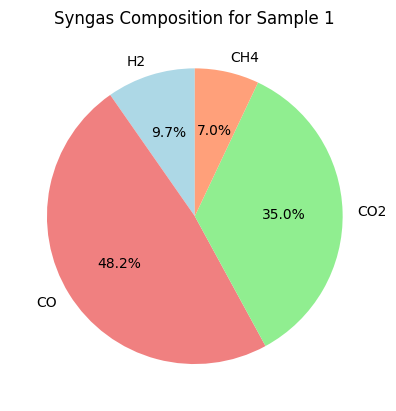

In [84]:
# Pie chart for Syngas Composition
labels = df.columns[9:13]
sizes = df.iloc[0, 9:13].values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Syngas Composition for Sample 1')
plt.show()

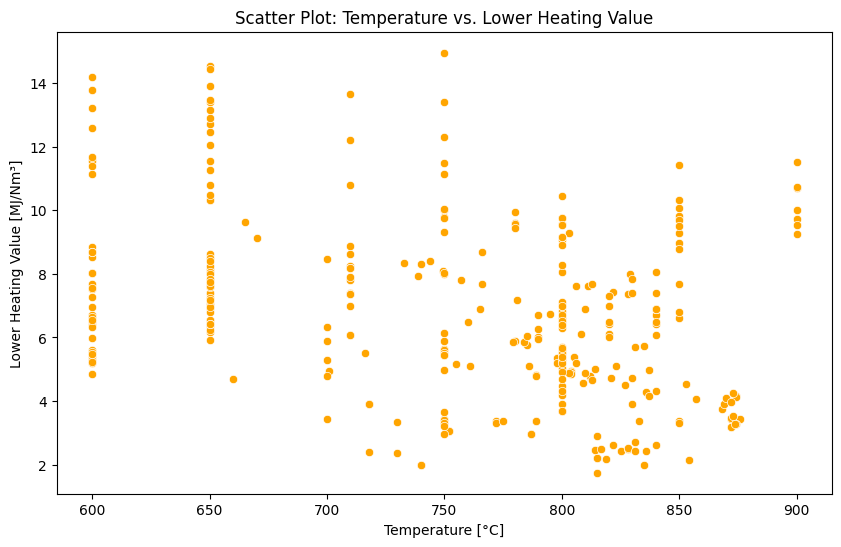

In [85]:
# Scatter plot for Temperature vs. Lower Heating Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp', y='Lower heating value', data=df, color='orange')
plt.title('Scatter Plot: Temperature vs. Lower Heating Value')
plt.xlabel('Temperature [°C]')
plt.ylabel('Lower Heating Value [MJ/Nm³]')
plt.show()


#Feature Selection

In [86]:
# Independent variables (features)
independent_variables = df.columns[1:9]
print("Independent Variables (Features):")
print(independent_variables)

# Dependent variables (output)
dependent_variables = df.columns[9:]
print("\nDependent Variables (Output):")
print(dependent_variables)


Independent Variables (Features):
Index(['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure',
       'Equivalance mass ratio', 'Steam to biomass mass ratio',
       'Superficial gas velocity'],
      dtype='object')

Dependent Variables (Output):
Index(['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield',
       'tar yield'],
      dtype='object')


In [87]:
correlation_threshold = 0.3

# Select independent variables (features) with moderate correlation
selected_features = correlation_matrix.index[(abs(correlation_matrix[dependent_variables]) > correlation_threshold).any(axis=1)].tolist()

# Display the selected features
print("Selected Independent Variables (Features):")
print(selected_features)

# Choose the dependent variables
selected_dependent_variables = dependent_variables

# Display the selected dependent variables
print("\nSelected Dependent Variables (Output):")
print(selected_dependent_variables)

# Create X (independent variables) and y (dependent variables)
X = df[selected_features]
y = df[selected_dependent_variables]

# Display the first few rows of X and y
print("\nX (Independent Variables):")
print(X.head())

print("\ny (Dependent Variables):")
print(y.head())


Selected Independent Variables (Features):
['Number', 'Lignin', 'Temp', 'Pressure', 'Equivalance mass ratio', 'Steam to biomass mass ratio', 'H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']

Selected Dependent Variables (Output):
Index(['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield',
       'tar yield'],
      dtype='object')

X (Independent Variables):
   Number    Lignin   Temp  Pressure  Equivalance mass ratio  \
0       1  0.251135  665.0       1.0                    0.25   
1       2  0.251135  744.0       1.0                    0.30   
2       3  0.251135  811.0       1.0                    0.35   
3       4  0.251135  670.0       1.0                    0.25   
4       5  0.251135  750.0       1.0                    0.30   

   Steam to biomass mass ratio         H2         CO        CO2       CH4  \
0                          0.0   9.696970  48.242424  35.030303  7.030303   
1                          0.0  10.125904  40.048219  43.477096

#Random Forest Model

In [88]:
# Select one dependent variable at a time
for target_variable in selected_dependent_variables:
    y_single = y[target_variable]

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Display the results for each dependent variable
    print(f"\nResults for Random Forest - {target_variable}:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")



Results for Random Forest - H2:
R2 Score: 0.9727
Mean Squared Error: 3.2527

Results for Random Forest - CO:
R2 Score: 0.9896
Mean Squared Error: 0.5795

Results for Random Forest - CO2:
R2 Score: 0.9967
Mean Squared Error: 0.2745

Results for Random Forest - CH4:
R2 Score: 0.9967
Mean Squared Error: 0.0541

Results for Random Forest - Lower heating value:
R2 Score: 0.9997
Mean Squared Error: 0.0023

Results for Random Forest - Char yield:
R2 Score: 0.9994
Mean Squared Error: 0.0648

Results for Random Forest - tar yield:
R2 Score: 0.9995
Mean Squared Error: 0.2093


#Predicted vs. Actual Value Table

In [89]:
# Initialize an empty DataFrame to store predictions
predictions_df = pd.DataFrame()

# Select one dependent variable at a time
for target_variable in selected_dependent_variables:
    y_single = y[target_variable]

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Create a DataFrame with actual and predicted values
    pred_table = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })

    #  predictions added
    predictions_df[target_variable + '_Actual'] = pred_table['Actual']
    predictions_df[target_variable + '_Predicted'] = pred_table['Predicted']

    # Display the prediction table for each dependent variable
    print(f"\nPrediction Table for {target_variable}:")
    print(pred_table)

# Display
predictions_df.head()



Prediction Table for H2:
        Actual  Predicted
72    5.388034   6.005410
110  20.533881  20.591908
298  24.571429  24.560205
108  18.325792  18.398152
277   9.598080   9.437321
..         ...        ...
299  21.212121  21.233873
295  24.632353  24.595379
328  37.125129  37.259687
84   28.774929  28.776400
245  27.556828  27.603796

[68 rows x 2 columns]

Prediction Table for CO:
        Actual  Predicted
72   27.538893  27.583783
110  32.032854  32.080052
298  37.904762  37.935653
108  37.556561  37.527697
277  41.301740  41.758816
..         ...        ...
299  39.393939  39.453910
295  41.360294  41.185101
328  13.133402  12.566263
84   28.205128  28.205656
245  29.837731  29.924632

[68 rows x 2 columns]

Prediction Table for CO2:
        Actual  Predicted
72   60.242474  59.163361
110  34.907598  34.885756
298  28.190476  28.211346
108  32.126697  32.188919
277  43.401320  43.457282
..         ...        ...
299  29.696970  29.582200
295  24.632353  24.613688
328  44.053775  4

,H2_Actual,H2_Predicted,CO_Actual,CO_Predicted,CO2_Actual,CO2_Predicted,CH4_Actual,CH4_Predicted,Lower heating value_Actual,Lower heating value_Predicted,Char yield_Actual,Char yield_Predicted,tar yield_Actual,tar yield_Predicted
72,5.388034,6.005410,27.538893,27.583783,60.242474,59.163361,6.830599,6.867596,8.080000,8.033246,17.90000,17.991000,10.910,11.00260
110,20.533881,20.591908,32.032854,32.080052,34.907598,34.885756,12.525667,12.528395,5.205825,5.196974,6.32738,6.420646,17.500,17.04670
298,24.571429,24.560205,37.904762,37.935653,28.190476,28.211346,9.333333,9.352561,6.000000,6.022617,4.60000,4.572362,0.011,0.01064
108,18.325792,18.398152,37.556561,37.527697,32.126697,32.188919,11.990950,11.871809,4.865017,4.873643,9.89638,10.089320,21.400,21.67951
277,9.598080,9.437321,41.301740,41.758816,43.401320,43.457282,5.698860,5.528307,3.420000,3.413776,0.00000,0.058491,59.400,60.57461


#Support Vector Machines

In [90]:
from sklearn.metrics import classification_report

# Initialize an empty DataFrame to store predictions for SVM
svm_predictions_df = pd.DataFrame()

# Select one dependent variable at a time
for target_variable in selected_dependent_variables:
    y_single = y[target_variable]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)

    # Initializing and training the SVM model
    svm_model = SVR()
    svm_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_svm = svm_model.predict(X_test)

    #  DataFrame with actual and predicted values generated
    svm_pred_table = pd.DataFrame({
        'Actual': y_test,
        'Predicted_SVM': y_pred_svm
    })

    #  predictions
    svm_predictions_df[target_variable + '_Actual'] = svm_pred_table['Actual']
    svm_predictions_df[target_variable + '_Predicted_SVM'] = svm_pred_table['Predicted_SVM']
# regression metrics for SVM
    r2_svm = r2_score(y_test, y_pred_svm)
    mse_svm = mean_squared_error(y_test, y_pred_svm)
    print(f"\nSVM Regression Metrics for {target_variable}:")
    print(f"R2 Score: {r2_svm}")
    print(f"Mean Squared Error: {mse_svm}")


SVM Regression Metrics for H2:
R2 Score: 0.008284956674772359
Mean Squared Error: 118.17216054482421

SVM Regression Metrics for CO:
R2 Score: 0.01722627266251986
Mean Squared Error: 54.82592006769596

SVM Regression Metrics for CO2:
R2 Score: -0.035052632134009
Mean Squared Error: 84.92106034002072

SVM Regression Metrics for CH4:
R2 Score: 0.47568167830885877
Mean Squared Error: 8.573133835902444

SVM Regression Metrics for Lower heating value:
R2 Score: 0.07961167529244673
Mean Squared Error: 6.592943348752811

SVM Regression Metrics for Char yield:
R2 Score: -0.19101522308620633
Mean Squared Error: 134.27343684895763

SVM Regression Metrics for tar yield:
R2 Score: 0.08339984935484357
Mean Squared Error: 372.4093097447366


#Predictions

In [91]:
# Initialize an empty DataFrame to store predictions for SVM
svm_predictions_df = pd.DataFrame()

# Select one dependent variable at a time
for target_variable in selected_dependent_variables:
    y_single = y[target_variable]

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)

    # Initialize and train the SVM model
    svm_model = SVR()
    svm_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_svm = svm_model.predict(X_test)

    # Create a DataFrame with actual and predicted values for SVM
    svm_pred_table = pd.DataFrame({
        'Actual': y_test,
        'Predicted_SVM': y_pred_svm
    })

    # Add the predictions to the overall svm_predictions_df
    svm_predictions_df[target_variable + '_Actual'] = svm_pred_table['Actual']
    svm_predictions_df[target_variable + '_Predicted_SVM'] = svm_pred_table['Predicted_SVM']

    # Display the prediction table for each dependent variable for SVM
    print(f"\nSVM Prediction Table for {target_variable}:")
    print(svm_pred_table)

# Display
svm_predictions_df.head()



SVM Prediction Table for H2:
        Actual  Predicted_SVM
72    5.388034      26.045209
110  20.533881      26.086196
298  24.571429      26.352774
108  18.325792      26.021876
277   9.598080      25.704806
..         ...            ...
299  21.212121      26.312505
295  24.632353      26.416091
328  37.125129      26.425045
84   28.774929      26.059653
245  27.556828      26.834883

[68 rows x 2 columns]

SVM Prediction Table for CO:
        Actual  Predicted_SVM
72   27.538893      32.433177
110  32.032854      32.670769
298  37.904762      32.793291
108  37.556561      32.759414
277  41.301740      33.393945
..         ...            ...
299  39.393939      32.826720
295  41.360294      32.715260
328  13.133402      32.722614
84   28.205128      32.727103
245  29.837731      31.926804

[68 rows x 2 columns]

SVM Prediction Table for CO2:
        Actual  Predicted_SVM
72   60.242474      31.579659
110  34.907598      31.688525
298  28.190476      29.922173
108  32.126697      31.

,H2_Actual,H2_Predicted_SVM,CO_Actual,CO_Predicted_SVM,CO2_Actual,CO2_Predicted_SVM,CH4_Actual,CH4_Predicted_SVM,Lower heating value_Actual,Lower heating value_Predicted_SVM,Char yield_Actual,Char yield_Predicted_SVM,tar yield_Actual,tar yield_Predicted_SVM
72,5.388034,26.045209,27.538893,32.433177,60.242474,31.579659,6.830599,10.320519,8.080000,6.377957,17.90000,8.419950,10.910,7.191206
110,20.533881,26.086196,32.032854,32.670769,34.907598,31.688525,12.525667,9.536268,5.205825,6.109358,6.32738,8.449213,17.500,7.119869
298,24.571429,26.352774,37.904762,32.793291,28.190476,29.922173,9.333333,9.295795,6.000000,5.990630,4.60000,6.201258,0.011,10.133788
108,18.325792,26.021876,37.556561,32.759414,32.126697,31.809663,11.990950,9.424046,4.865017,6.057262,9.89638,8.580628,21.400,7.029936
277,9.598080,25.704806,41.301740,33.393945,43.401320,31.211593,5.698860,8.243378,3.420000,5.317694,0.00000,7.059771,59.400,9.525182


#Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor
dt_predictions_df = pd.DataFrame()

# dependent variable
for target_variable in selected_dependent_variables:
    y_single = y[target_variable]

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree model
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_dt = dt_model.predict(X_test)

    # Create a DataFrame with actual and predicted values for Decision Tree
    dt_pred_table = pd.DataFrame({
        'Actual': y_test,
        'Predicted_DT': y_pred_dt
    })

    # Add the predictions
    dt_predictions_df[target_variable + '_Actual'] = dt_pred_table['Actual']
    dt_predictions_df[target_variable + '_Predicted_DT'] = dt_pred_table['Predicted_DT']

    # regression metrics for Decision Tree
    r2_dt = r2_score(y_test, y_pred_dt)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    print(f"\nDecision Tree Regression Metrics for {target_variable}:")
    print(f"R2 Score: {r2_dt}")
    print(f"Mean Squared Error: {mse_dt}")


Decision Tree Regression Metrics for H2:
R2 Score: 0.9617535888771331
Mean Squared Error: 4.557419054893347

Decision Tree Regression Metrics for CO:
R2 Score: 0.9957536565301086
Mean Squared Error: 0.23689042674245175

Decision Tree Regression Metrics for CO2:
R2 Score: 0.9884491492689099
Mean Squared Error: 0.9476914134222213

Decision Tree Regression Metrics for CH4:
R2 Score: 0.998361426900133
Mean Squared Error: 0.026792324250200533

Decision Tree Regression Metrics for Lower heating value:
R2 Score: 0.998980053954066
Mean Squared Error: 0.00730609713216849

Decision Tree Regression Metrics for Char yield:
R2 Score: 0.9987453111670701
Mean Squared Error: 0.14145191304687768

Decision Tree Regression Metrics for tar yield:
R2 Score: 0.9977658734108392
Mean Squared Error: 0.9077126382382955


#Predictions

In [93]:
# Display predictions in tabular structure
print("\nDecision Tree Prediction Table:")
print(dt_predictions_df.to_string(index=False))


Decision Tree Prediction Table:
 H2_Actual  H2_Predicted_DT  CO_Actual  CO_Predicted_DT  CO2_Actual  CO2_Predicted_DT  CH4_Actual  CH4_Predicted_DT  Lower heating value_Actual  Lower heating value_Predicted_DT  Char yield_Actual  Char yield_Predicted_DT  tar yield_Actual  tar yield_Predicted_DT
  5.388034         5.516307  27.538893        27.274053   60.242474         62.560216    6.830599          6.927930                    8.080000                          8.032235          17.900000                17.900000         10.910000               10.800000
 20.533881        20.799630  32.032854        32.083333   34.907598         34.800000   12.525667         12.658228                    5.205825                          5.205825           6.327380                 6.400000         17.500000               16.900000
 24.571429        24.800000  37.904762        37.924935   28.190476         28.210117    9.333333          9.347826                    6.000000                          6.0000

#Model Comparison Analysis

<ipython-input-94-9e3a69263b42>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'Mean Squared Error': mse}, ignore_index=True)
<ipython-input-94-9e3a69263b42>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'Mean Squared Error': mse}, ignore_index=True)
<ipython-input-94-9e3a69263b42>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'Mean Squared Error': mse}, ignore_index=True)



Comparison Analysis Results:
           Model  R2 Score  Mean Squared Error
0  Random Forest  0.999498            0.203885
1  Decision Tree  0.994670            2.165432
2            SVM  0.083400          372.409310


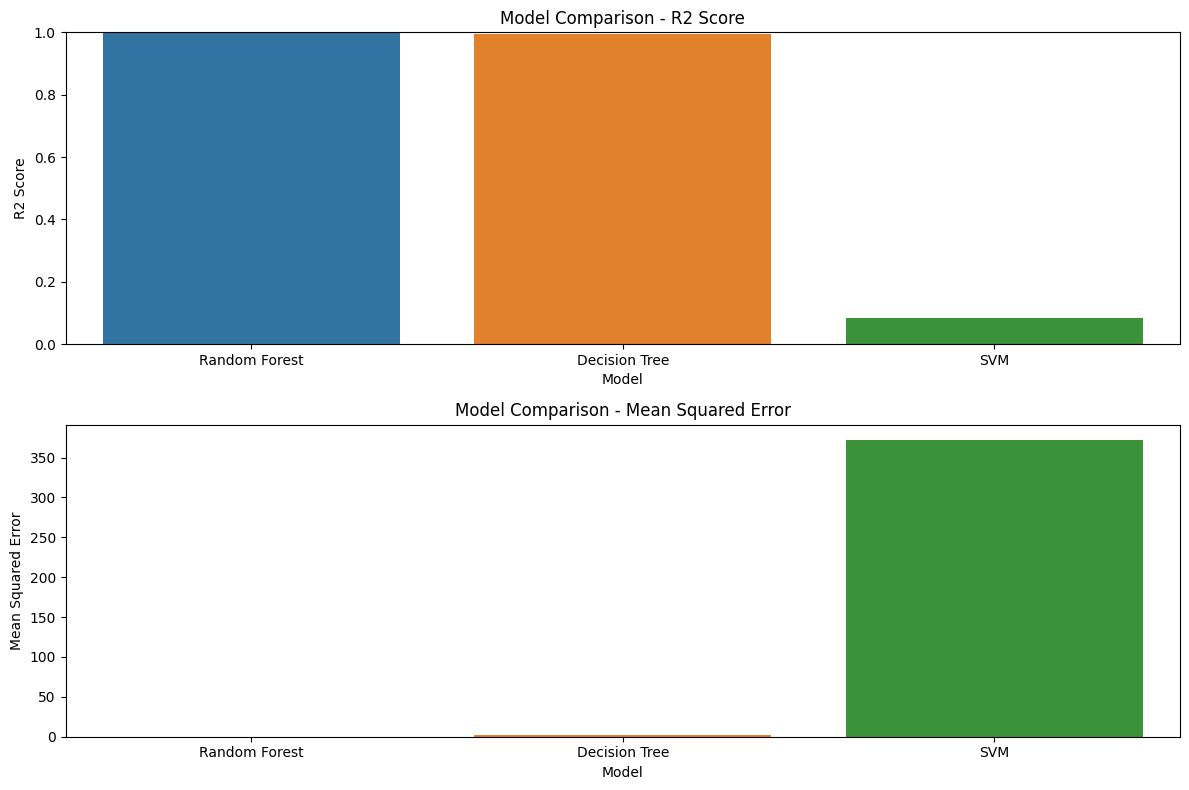

In [94]:
# Dictionary to store models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVM': SVR()
}

# Results DataFrame
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'Mean Squared Error'])

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Append results to the DataFrame
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'Mean Squared Error': mse}, ignore_index=True)

# Display the comparison analysis results
print("\nComparison Analysis Results:")
print(results_df)

# Plotting the comparison graph
plt.figure(figsize=(12, 8))

# Bar chart for R2 Score
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('Model Comparison - R2 Score')
plt.ylim(0, 1)  # Set the y-axis limit for R2 Score

# Bar chart for Mean Squared Error
plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='Mean Squared Error', data=results_df)
plt.title('Model Comparison - Mean Squared Error')

plt.tight_layout()
plt.show()

#Feature Importance

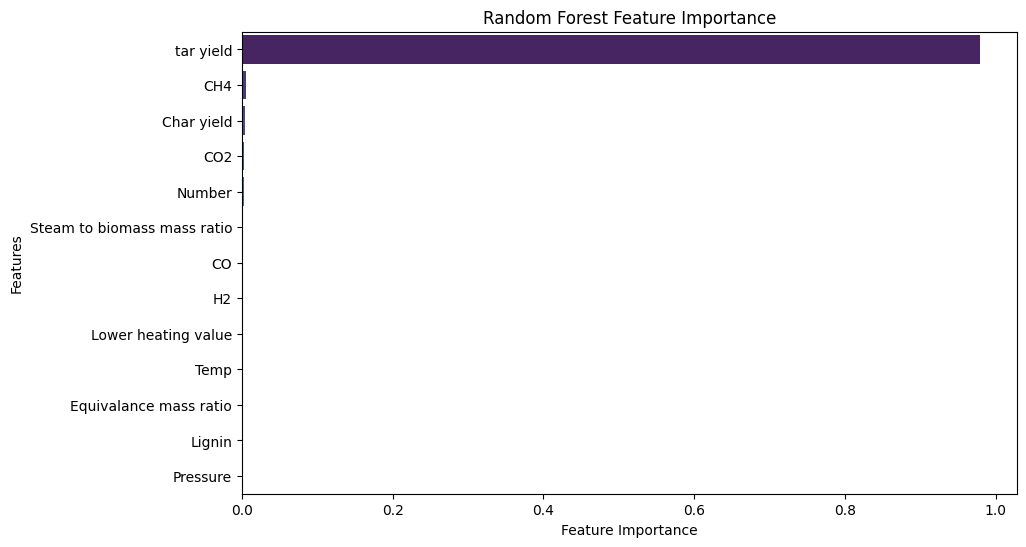

In [95]:
# feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#Most Impacted Depedent Variables

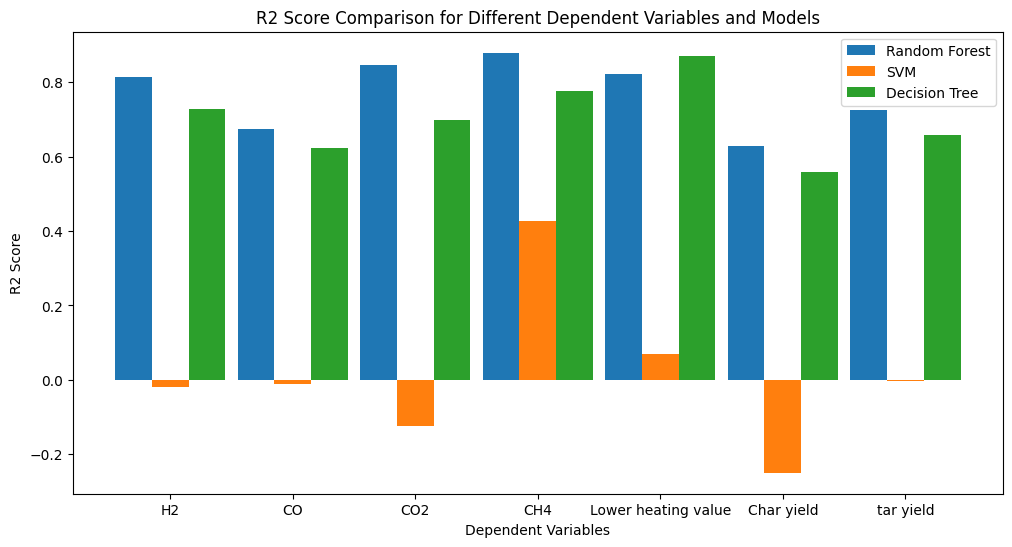

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
dependent_variables = ['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']
random_forest_r2 = [0.8145, 0.6751, 0.8471, 0.8788, 0.8229, 0.6289, 0.7252]
svm_r2 = [-0.01799368884335384, -0.01088555729358398, -0.12305264394767557, 0.42713183202373395, 0.06923121166599855, -0.24939596944170717, -0.002190115878808241]
decision_tree_r2 = [0.7276581606463557, 0.6236345280903688, 0.6985012457237887, 0.7760078339849763, 0.8707649386258932, 0.5585655862786217, 0.6581894817325565]

# Create a bar plot
width = 0.3
bar_positions_rf = np.arange(len(dependent_variables))
bar_positions_svm = bar_positions_rf + width
bar_positions_dt = bar_positions_svm + width

plt.figure(figsize=(12, 6))

plt.bar(bar_positions_rf, random_forest_r2, width, label='Random Forest')
plt.bar(bar_positions_svm, svm_r2, width, label='SVM')
plt.bar(bar_positions_dt, decision_tree_r2, width, label='Decision Tree')

plt.xlabel('Dependent Variables')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison for Different Dependent Variables and Models')
plt.xticks(bar_positions_svm, dependent_variables)
plt.legend()

plt.show()
